In [1]:
import pandas as pd

In [2]:
task1_results = pd.read_csv("result_csvs/task1.csv")
task2_results = pd.read_csv("result_csvs/task2.csv")
task3_results = pd.read_csv("result_csvs/task3.csv")

In [18]:
task1_results["Task"] = "Anatomical Site Classification  \n Balanced accuracy"
task1_results["metric"] = task1_results["BA"]
task1_results["Order"] = 0

task2_results["Task"] = "Malignancy Classification \n AUC"
task2_results["Order"] = 4

task2_results["metric"] = task2_results["AUC"]

task3_results["Task"] = " Prognosis Prediction \n AUC"
task3_results["Order"] = 8

task3_results["metric"] = task3_results["AUC"]
task3_results["Data Percentage"] = 1

In [19]:
combined_results = pd.concat([task1_results, task2_results, task3_results])
# combined_results = combined_results[combined_results['Data Percentage'].isin([1, 0.1])]

combined_results["Task"] = combined_results.apply(
    lambda x: x["Task"] + "\n@ " + str(x["Data Percentage"] * 100) + "%" if x["Data Percentage"] != 1 else x["Task"], axis=1
)


def set_order(data_perc, order):
    if data_perc == 0.5:
        order += 1
    elif data_perc == 0.2:
        order += 2
    elif data_perc == 0.1:
        order += 3
    return order


combined_results["Order"] = combined_results.apply(lambda x: set_order(x["Data Percentage"], x["Order"]), axis=1)

# combined_results[combined_results['Data Percentage'] == 0.1]['Task'] = combined_results['Task'] + '@ 10%'

In [20]:
combined_results.sort_values(by=["Order"], inplace=True, ascending=True)

/tmp/ipykernel_1359225/1463236318.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  implementation_data = implementation_data.append(implementation_data.iloc[0])
/tmp/ipykernel_1359225/1463236318.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  implementation_data = implementation_data.append(implementation_data.iloc[0])
/tmp/ipykernel_1359225/1463236318.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  implementation_data = implementation_data.append(implementation_data.iloc[0])
/tmp/ipykernel_1359225/1463236318.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  implementation_data = implementation_data.append(implementatio

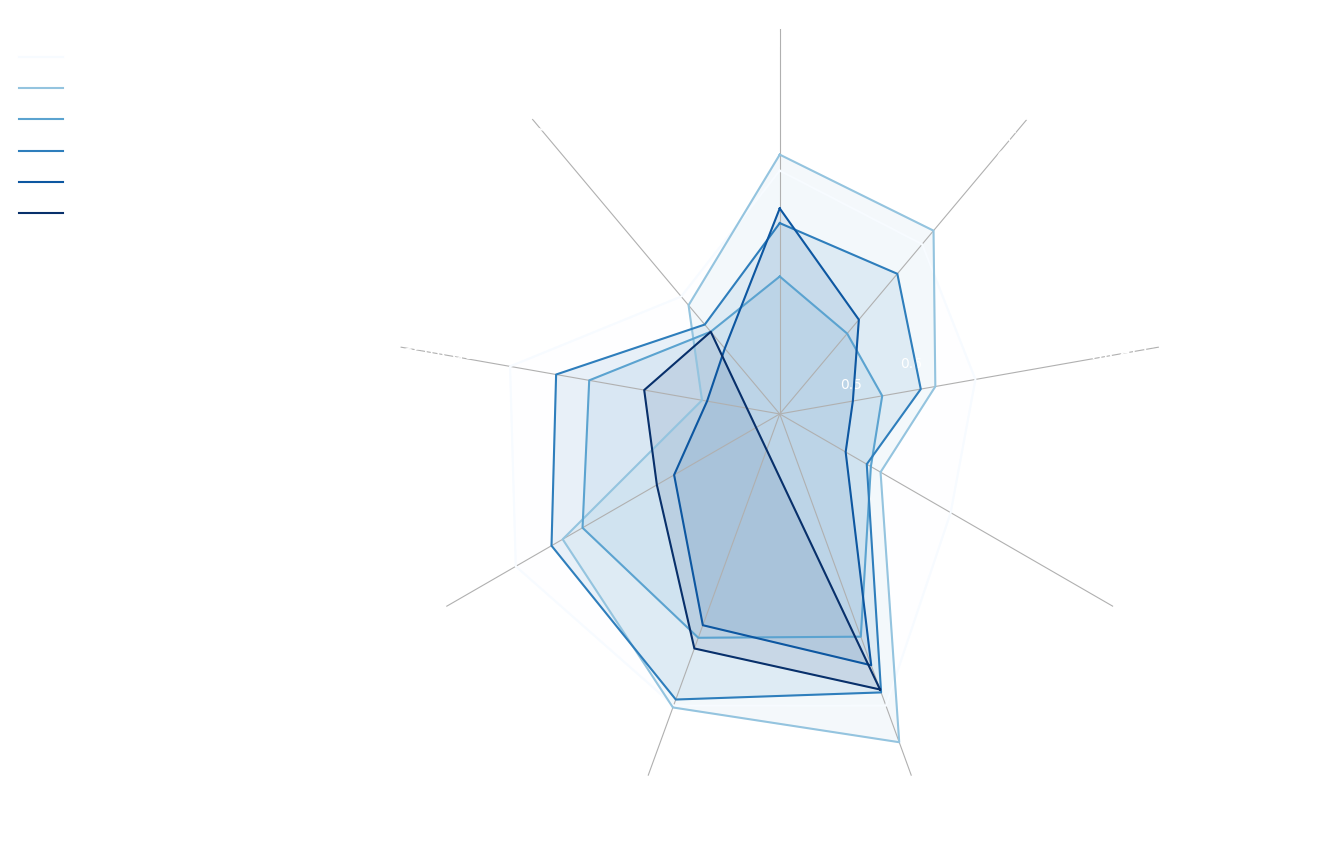

In [30]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.color"] = "white"
combined_results["Task"] = combined_results["Task"].astype("category")
combined_results["Task_codes"] = combined_results["Order"]
# combined_results.sort_values(by=["Task_codes"], inplace=True)

# Create a list of unique 'Implementation' values
implementations = combined_results["Implementation"].sort_values().unique()

# Create a figure and polar projection
fig = plt.figure(figsize=(20, 10))  # Make the background transparent
ax = fig.add_subplot(111, polar=True)

# Define a color palette of different shades of blue
color_palette = plt.cm.Blues(np.insert(np.linspace(0.4, 1, len(implementations) - 1), 0, 0))

# Plot a line for each 'Implementation'
for idx, implementation in enumerate(implementations):
    implementation_data = combined_results[combined_results["Implementation"] == implementation]
    # Append the first row to the end to complete the radar plot
    implementation_data = implementation_data.append(implementation_data.iloc[0])
    ax.plot(
        np.deg2rad(implementation_data["Task_codes"] * 360 / len(combined_results["Task"].cat.categories)),
        implementation_data["metric"],
        label=implementation,
        color=color_palette[idx],
    )
    ax.fill(
        np.deg2rad(implementation_data["Task_codes"] * 360 / len(combined_results["Task"].cat.categories)),
        implementation_data["metric"],
        color=color_palette[idx],
        alpha=0.1,
    )

# Set the theta zero location and direction
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Set the r limits and label
ax.set_ylim([0.4, 1])
ax.set_rlabel_position(70)
ax.set_xticks(np.deg2rad(np.linspace(0, 360, len(combined_results["Task"].cat.categories), endpoint=False)))
ax.set_xticklabels(
    combined_results["Task"].unique(), fontsize=14, verticalalignment="top", color="white"
)  # Increase font size and add more space between the plot and tick labels
ax.xaxis.label.set_color("white")  # Make xticks white color
ax.legend(
    bbox_to_anchor=(0, 1), fontsize=16, frameon=False, facecolor="white", ncol=1
)  # Increase font size, make legend transparent and text white, and make legend horizontal
ax.spines["polar"].set_visible(False)
ax.tick_params(axis="y", colors="white")

ax.yaxis.grid(False)
plt.show()
fig.savefig("combined_results.png", transparent=True, dpi=500)  # Save the figure with a transparent background